In [73]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities, matutils
from textblob import TextBlob

import string
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

from utils import display_topics, make_stopwords, titles
from wordcloud import WordCloud

In [21]:
sw = make_stopwords()
all_books_nosw_singularized = pd.read_pickle('data/allbooks_sing_nosw.pkl')
english_words = set(nltk.corpus.words.words())

In [59]:
#Series of chapters RJ wrote
jordan_books = all_books_nosw_singularized.iloc[:515]['text']

#tokenized words RJ wrote
jordan_text = ' '.join(jordan_books).split()

#English words only
jordan_text_eng = [word for word in jordan_text if word in english_words]

#The set of english words RJ wrote
jordan_set = set(jordan_text_eng)

In [29]:
#Frequency distribution of words written by RJ
jordan_dist = FreqDist(jordan_text_eng)

#Most common words written by RJ
jordan_most_common = set([item[0] for item in jordan_dist.most_common()[1000:2000]])

In [61]:
#Series of chapters BS wrote
sanderson_books = all_books_nosw_singularized.iloc[515:]['text']

#tokenized words BS wrote
sanderson_text = ' '.join(sanderson_books).split()

#English words only
sanderson_text_eng = [word for word in sanderson_text if word in english_words]

#The set of english words BS wrote
sanderson_set = set(sanderson_text_eng)

In [34]:
#Frequency distribution of words written by BS
sanderson_dist = FreqDist(sanderson_text_eng)

#Most common words written by BS
sanderson_most_common = set([item[0] for item in sanderson_dist.most_common()[0:]])

In [79]:
def get_pos(text_string, pos_list):
    tokens = word_tokenize(text_string)
    tokens_pos = nltk.pos_tag(tokens)
    words = [word[0] for word in tokens_pos if word[1][:2] in pos_list]
    return words

In [81]:
jordan_pos = get_pos(' '.join(jordan_text_eng),['JJ', 'RB', 'VB'])

In [164]:
jordan_pos_dist = FreqDist(jordan_pos)
jordan_pos_most_common = set([item[0] for item in jordan_pos_dist.most_common()[0:]])

10146

In [85]:
sanderson_pos = get_pos(' '.join(sanderson_text_eng),['JJ', 'RB', 'VB'])

In [165]:
sanderson_pos_dist = FreqDist(sanderson_pos)
sanderson_pos_most_common = set([item[0] for item in sanderson_pos_dist.most_common()[0:]])

In [166]:
sanderson_only_ads = sanderson_pos_most_common.difference(jordan_pos_most_common)
jordan_only_ads = jordan_pos_most_common.difference(sanderson_pos_most_common)

In [167]:
sanderson_only_ads_full=" ".join([word for word in sanderson_pos if word in sanderson_only_ads and word != 'androl'])
jordan_only_ads_full=" ".join([word for word in jordan_pos if word in jordan_only_ads and word != 'androl'])

In [168]:
len(jordan_only_ads_full)

128884

In [169]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = sw, 
                min_font_size = 10).generate(sanderson_only_ads_full) 

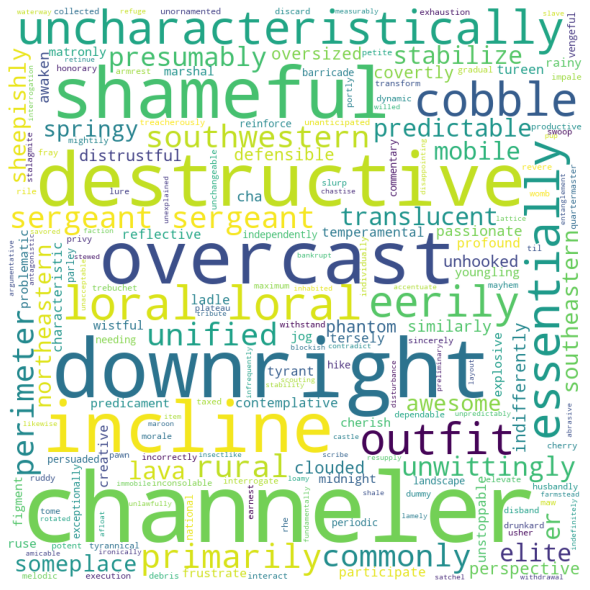

In [170]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [182]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = sw, 
                min_font_size = 10).generate(jordan_only_ads_full) 

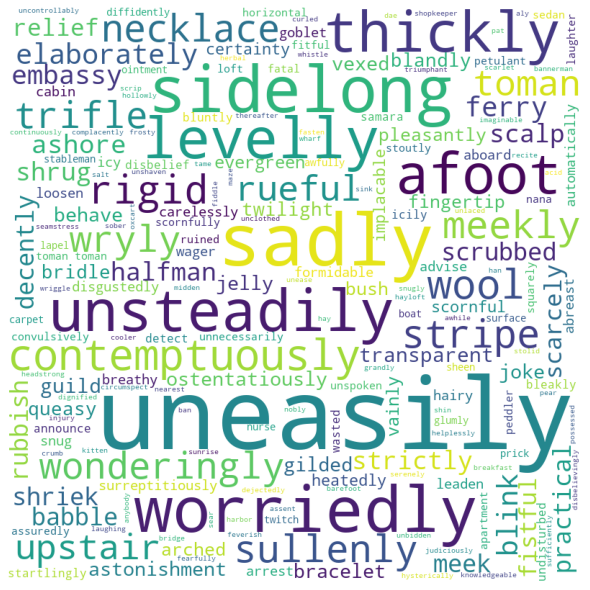

In [183]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 